In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv("customer_booking.csv", encoding='latin-1')

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

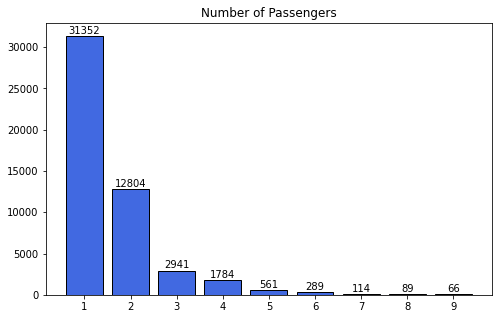

In [5]:
x, height = [sorted(list(df['num_passengers'].unique().astype(str))), 
             list(df['num_passengers'].value_counts().sort_index())]
plt.figure(figsize=(8, 5))
plt.bar(x, height, color=['royalblue'], edgecolor="black")
plt.title("Number of Passengers")
_, _, _, ymax = plt.axis()
for i in range(0, len(x)):
        plt.text(i,(height[i])+(ymax/120),height[i], ha = 'center', size=10)

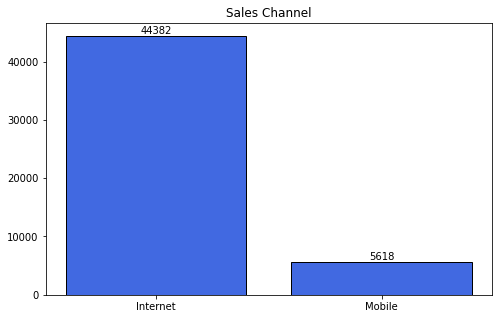

In [6]:
x, height = [sorted(list(df['sales_channel'].unique().astype(str))), 
             list(df['sales_channel'].value_counts().sort_index())]
plt.figure(figsize=(8, 5))
plt.bar(x, height, color=['royalblue'], edgecolor="black")
plt.title("Sales Channel")
_, _, _, ymax = plt.axis()
for i in range(0, len(x)):
        plt.text(i,(height[i])+(ymax/125),height[i], ha = 'center', size=10)

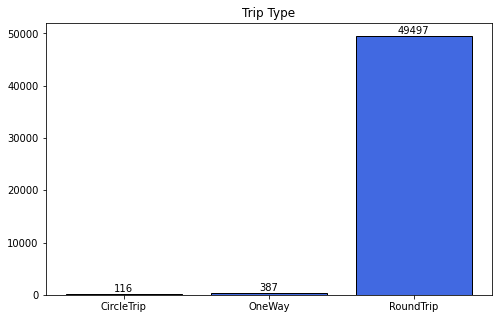

In [7]:
x, height = [sorted(list(df['trip_type'].unique().astype(str))), 
             list(df['trip_type'].value_counts().sort_index())]
plt.figure(figsize=(8, 5))
plt.bar(x, height, color=['royalblue'], edgecolor="black")
plt.title("Trip Type")
_, _, _, ymax = plt.axis()
for i in range(0, len(x)):
        plt.text(i,(height[i])+(ymax/125),height[i], ha = 'center', size=10)

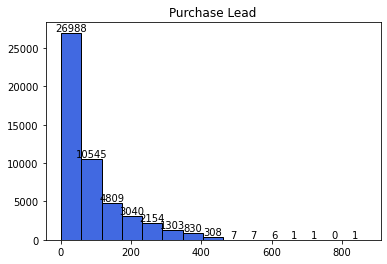

In [8]:
_, _, label = plt.hist(df['purchase_lead'], color=['royalblue'], edgecolor='black', bins=15)
plt.title("Purchase Lead")
plt.bar_label(label);

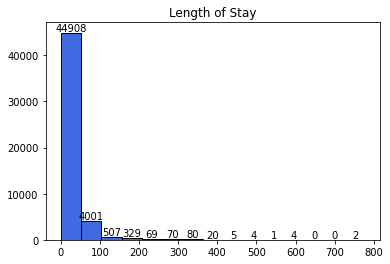

In [9]:
_, _, label = plt.hist(df['length_of_stay'], color=['royalblue'], edgecolor='black',bins=15)
plt.title("Length of Stay")
plt.bar_label(label);

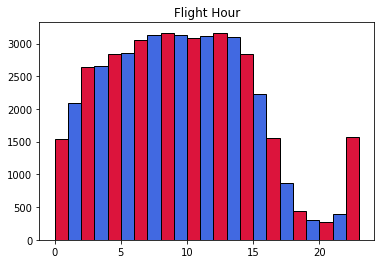

In [10]:
_, _, label = plt.hist(df['flight_hour'], color=['royalblue'], edgecolor='black',bins=23)
for i in range(len(label)):
    if(i%2 == 0):
        label[i].set_facecolor('crimson')
plt.title("Flight Hour");

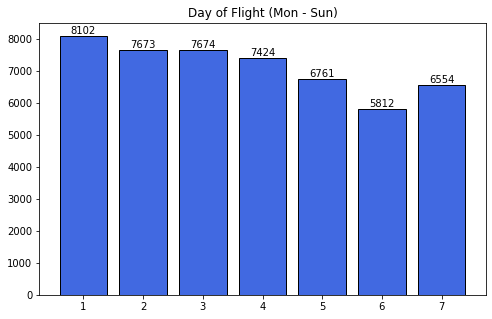

In [11]:
x, height = [sorted(list(df['flight_day'].unique().astype(str))), 
             list(df['flight_day'].value_counts().sort_index())]
plt.figure(figsize=(8, 5))
plt.bar(x, height, color=['royalblue'], edgecolor="black")
plt.title("Day of Flight (Mon - Sun)")
_, _, _, ymax = plt.axis()
for i in range(0, len(x)):
        plt.text(i,(height[i])+(ymax/120),height[i], ha = 'center', size=10)

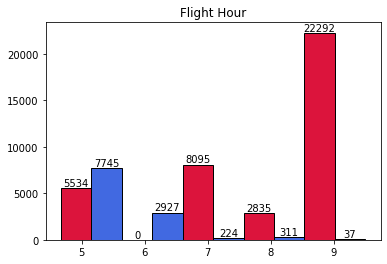

In [12]:
_, _, label = plt.hist(df['flight_duration'], color=['royalblue'], edgecolor='black',bins=10)
for i in range(len(label)):
    if(i%2 == 0):
        label[i].set_facecolor('crimson')
plt.title("Flight Hour")
plt.bar_label(label);

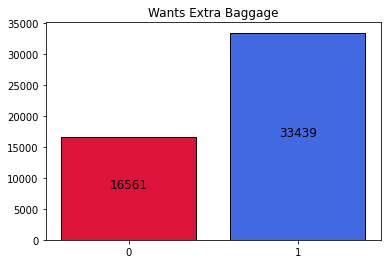

In [13]:
x, height = [sorted(list(df['wants_extra_baggage'].unique().astype(str))), 
             list(df['wants_extra_baggage'].value_counts().sort_index())]

plt.bar(x, height, color=['crimson', 'royalblue'], edgecolor="black")
plt.title("Wants Extra Baggage")
for i in range(0, len(x)):
        plt.text(i,(height[i])//2,height[i], ha = 'center', size=12)

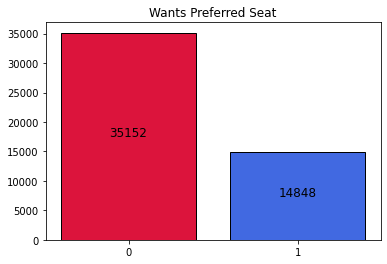

In [14]:
x, height = [sorted(list(df['wants_preferred_seat'].unique().astype(str))), 
             list(df['wants_preferred_seat'].value_counts().sort_index())]

plt.bar(x, height, color=['crimson', 'royalblue'], edgecolor="black")
plt.title("Wants Preferred Seat")
for i in range(0, len(x)):
        plt.text(i,(height[i])//2,height[i], ha = 'center', size=12)

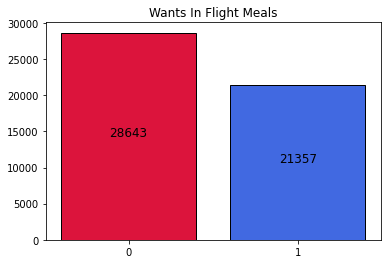

In [15]:
x, height = [sorted(list(df['wants_in_flight_meals'].unique().astype(str))), 
             list(df['wants_in_flight_meals'].value_counts().sort_index())]

plt.bar(x, height, color=['crimson', 'royalblue'], edgecolor="black")
plt.title("Wants In Flight Meals")
for i in range(0, len(x)):
        plt.text(i,(height[i])//2,height[i], ha = 'center', size=12)

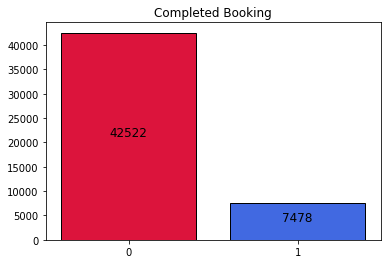

In [16]:
x, height = [sorted(list(df['booking_complete'].unique().astype(str))), 
             list(df['booking_complete'].value_counts().sort_index())]

plt.bar(x, height, color=['crimson', 'royalblue'], edgecolor="black")
plt.title("Completed Booking")
for i in range(0, len(x)):
        plt.text(i,(height[i])//2,height[i], ha = 'center', size=12)

In [17]:
df.corr(method='pearson').style.background_gradient(cmap='Blues', axis=0)

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.212606,-0.115850,0.015607,0.015407,0.120404,0.028544,0.022943,-0.063169,0.024116
purchase_lead,0.212606,1.000000,-0.076560,0.035973,0.036531,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,-0.000310,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.035973,-0.024872,1.000000,0.024086,-0.011434,0.012171,0.013014,-0.002101,0.007127
flight_day,0.015407,0.036531,-0.000310,0.024086,1.000000,-0.002503,0.005392,0.009281,0.018434,-0.006986
wants_extra_baggage,0.120404,-0.022207,0.176757,-0.011434,-0.002503,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,-0.004499,0.032264,0.012171,0.005392,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.022653,0.098828,0.013014,0.009281,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.063169,0.067866,0.141181,-0.002101,0.018434,0.057054,0.101289,0.154312,1.000000,-0.106266
booking_complete,0.024116,-0.022131,-0.042408,0.007127,-0.006986,0.068139,0.050116,0.026511,-0.106266,1.000000


In [18]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [19]:
X = df.drop(['sales_channel', 'trip_type', 'route', 'booking_origin', 'booking_complete'], axis=1)
y = df['booking_complete']
oversample = RandomOverSampler(sampling_strategy=1)
X, y = oversample.fit_resample(X, y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=26)

In [21]:
clf = DecisionTreeClassifier()
cvCLF = cross_validate(clf, X, y, cv=8)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     10672
           1       0.85      0.99      0.91     10589

    accuracy                           0.91     21261
   macro avg       0.92      0.91      0.91     21261
weighted avg       0.92      0.91      0.91     21261



In [23]:
print("Accuracy of Decision Tree Classifier 10 k-folds: {:.2f}%".format(cvCLF['test_score'].mean()*100))

Accuracy of Decision Tree Classifier 10 k-folds: 82.00%


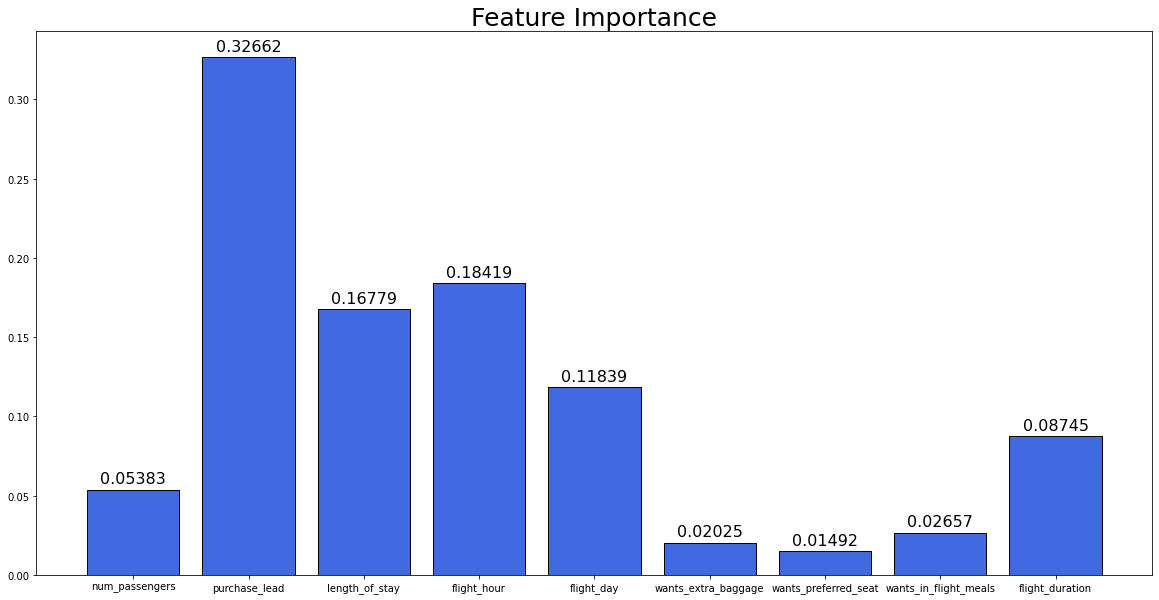

In [24]:
importance = clf.feature_importances_
plt.figure(figsize=(20, 10))
x, height = [X.columns, (np.round(importance, 5))]
plt.bar(x, height, color=['royalblue'], edgecolor="black")
plt.title("Feature Importance", size=25)
_, _, _, ymax = plt.axis()
for i in range(0, len(x)):
        plt.text(i,(height[i])+0.004, height[i], ha = 'center', size=16)